K Means Algorithm

Import the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the Dataset

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:,[3,4]].values

# we are using only these 2 columns for visualizing purpose

Using the elbow method to find the optimal number of clusters 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

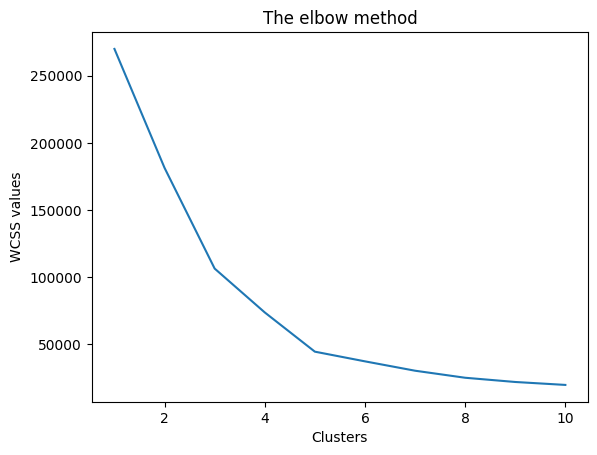

In [3]:
# WCSS ==> Within cluster sum of square

from sklearn.cluster import KMeans

# run the K means algorithm with 10 diffrent clusters to find the optimal number of clusters

# X axis contains the diffrent number of clusters and Y axis contains the WCSS for each clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Clusters")
plt.ylabel("WCSS values")
plt.show()

So over here the number of optimal clusters would be 5

because we have the curve starting to flatten after 5 clusters

Training the K means model on the dataset

In [4]:
kmeans = KMeans(n_clusters = 5 , init="k-means++" , random_state = 42)
y_kmeans = kmeans.fit_predict(X) # this makes the model and also returns the dependent models 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
print(y_kmeans) # these are the clusters to which the customers belong to

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Now we want to find the diffrent clusters that we have made 

Visualizing the clusters

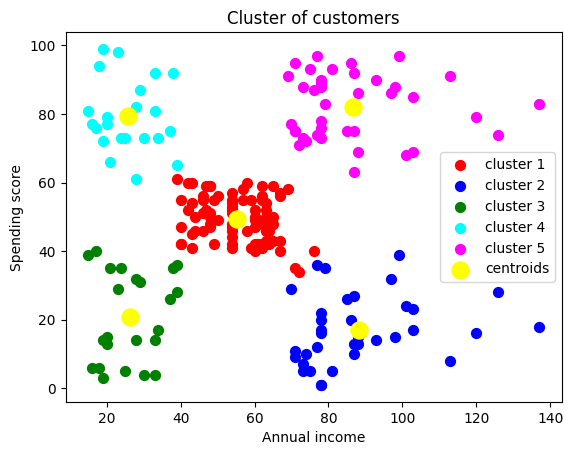

In [9]:
# we would be using multiple scatter plots to get the clusters

plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans == 0 , 1] , s = 50 ,c="red", label = "cluster 1")
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans == 1 , 1] , s = 50 , c="blue", label = "cluster 2")
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans == 2 , 1] , s = 50 , c="green", label = "cluster 3")
plt.scatter(X[y_kmeans == 3,0] , X[y_kmeans == 3 , 1] , s = 50 , c="cyan", label = "cluster 4")
plt.scatter(X[y_kmeans == 4,0] , X[y_kmeans == 4 , 1] , s = 50 , c="magenta", label = "cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] , s = 150 , c = "yellow" , label = "centroids")
plt.title("Cluster of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()